## Data Set Information:

Context: Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available

This archive contains 2075259 measurements gathered between December 2006 and November 2010 (47 months). Notes: 1.(globalactivepower*1000/60 - submetering1 - submetering2 - submetering3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

## Attribute Information:
1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.global_active_power: household global minute-averaged active power (in kilowatt). Global active power is the power consumed by appliances other than the appliances mapped to Sub Meters. Global active power is the real power consumption i.e. the power consumed by electrical appliances other than the sub metered appliances.It is basically called wattfull power.

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt). Global reactive power is the power which bounces back and froth without any usage or leakage. It is the imaginary power consumption. It is basically called wattless power.

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere). Intensity is magnitude of the power consumed. Also called as strength of current.

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import time
from sklearn.preprocessing import normalize
%matplotlib inline

import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('household_power_consumption.txt', sep = ';' , header=None,na_values=['nan','?'],low_memory=False)

In [3]:
df.to_csv('household_power_consumption.csv', index = None)

In [4]:
df

,0,1,2,3,4,5,6,7,8
0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
2,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
3,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
4,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
...,...,...,...,...,...,...,...,...,...
2075255,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.000
2075256,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.000
2075257,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.000
2075258,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.000


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,2075260,2075260,2049281,2049281,2049281,2049281,2049281,2049281,2049281
unique,1443,1441,4187,533,2838,222,89,82,33
top,5/12/2008,20:28:00,0.218,0.000,241.180,1.000,0.000,0.000,0.000
freq,1440,1442,9565,481561,3559,172785,1880175,1436830,852092


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075260 entries, 0 to 2075259
Data columns (total 9 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   0       object
 1   1       object
 2   2       object
 3   3       object
 4   4       object
 5   5       object
 6   6       object
 7   7       object
 8   8       object
dtypes: object(9)
memory usage: 142.5+ MB


In [7]:
df.rename(columns=df.iloc[0], inplace = True)


In [8]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
2,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
3,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
4,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000


In [9]:
df.drop(df.index[0], inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 1 to 2075259
Data columns (total 9 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   Date                   object
 1   Time                   object
 2   Global_active_power    object
 3   Global_reactive_power  object
 4   Voltage                object
 5   Global_intensity       object
 6   Sub_metering_1         object
 7   Sub_metering_2         object
 8   Sub_metering_3         object
dtypes: object(9)
memory usage: 142.5+ MB


In [11]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
2,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
3,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
4,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
5,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000
...,...,...,...,...,...,...,...,...,...
2075255,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.000
2075256,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.000
2075257,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.000
2075258,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.000


In [12]:
df['date']=pd.to_datetime(df['Date'] + df['Time'], format='%d/%m/%Y%H:%M:%S')

In [13]:
df=df.drop(['Date','Time'], axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 1 to 2075259
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    object        
 1   Global_reactive_power  object        
 2   Voltage                object        
 3   Global_intensity       object        
 4   Sub_metering_1         object        
 5   Sub_metering_2         object        
 6   Sub_metering_3         object        
 7   date                   datetime64[ns]
dtypes: datetime64[ns](1), object(7)
memory usage: 126.7+ MB


In [15]:
df.isna().mean() * 100

Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
date                     0.000000
dtype: float64

In [16]:
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
date                         0
dtype: int64

In [17]:
df.drop_duplicates(inplace=True) 

In [18]:
cols = df.columns.drop('date')

df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075259 entries, 1 to 2075259
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   date                   datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 142.5 MB


In [20]:
df['Voltage'].mean(),df['Voltage'].median()

(240.83985797447758, 241.01)

In [21]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [22]:
df_null = df.loc[pd.isnull(df).any(axis=1)]
df_null.tail(15)
df_null.head(15)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date
6840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-21 11:23:00
6841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-21 11:24:00
19725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-30 10:08:00
19726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-30 10:09:00
41833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-14 18:36:00
61910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-28 17:13:00
98255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-02-22 22:58:00
98256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-02-22 22:59:00
142589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-03-25 17:52:00
190498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-04-28 00:21:00



There are some options for dealing with with missing values 'nan'.

Option 1: Fill NaN with Outlier or Zero.

Option 2: Fill NaN with Mean Value or other values.

Option 3: Fill NaN with Last Value with .ffill()

I think filling NaNs with the last value is a little bit better in this case, because the time delta is only 1 minute.

Option 4: Fill NaN with Linearly Interpolated Value with .interpolate().

In [23]:
df = df.fillna(method='ffill')
print(len(df))
print(df.isnull().sum())

2075259
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
date                     0
dtype: int64


In [24]:
df.dropna()
print(df.isnull().sum())

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
date                     0
dtype: int64


In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Global_active_power,2075259.0,1.086168,1.053172,0.076,0.308,0.598,1.524,11.122
Global_reactive_power,2075259.0,0.123328,0.112514,0.000,0.048,0.100,0.194,1.390
Voltage,2075259.0,240.841608,3.235574,223.200,239.000,241.020,242.870,254.150
Global_intensity,2075259.0,4.604226,4.426775,0.200,1.400,2.600,6.400,48.400
Sub_metering_1,2075259.0,1.110995,6.115908,0.000,0.000,0.000,0.000,88.000
Sub_metering_2,2075259.0,1.287958,5.786865,0.000,0.000,0.000,1.000,80.000
Sub_metering_3,2075259.0,6.416570,8.419505,0.000,0.000,1.000,17.000,31.000


In [26]:
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day_Name'] = df['date'].dt.day_name()
df['Hour'] = df['date'].dt.hour
df['quarter']=df['date'].dt.quarter
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date,Year,Month,Day_Name,Hour,quarter
1,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,Saturday,17,4
2,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,Saturday,17,4
3,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,Saturday,17,4
4,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,Saturday,17,4
5,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,Saturday,17,4


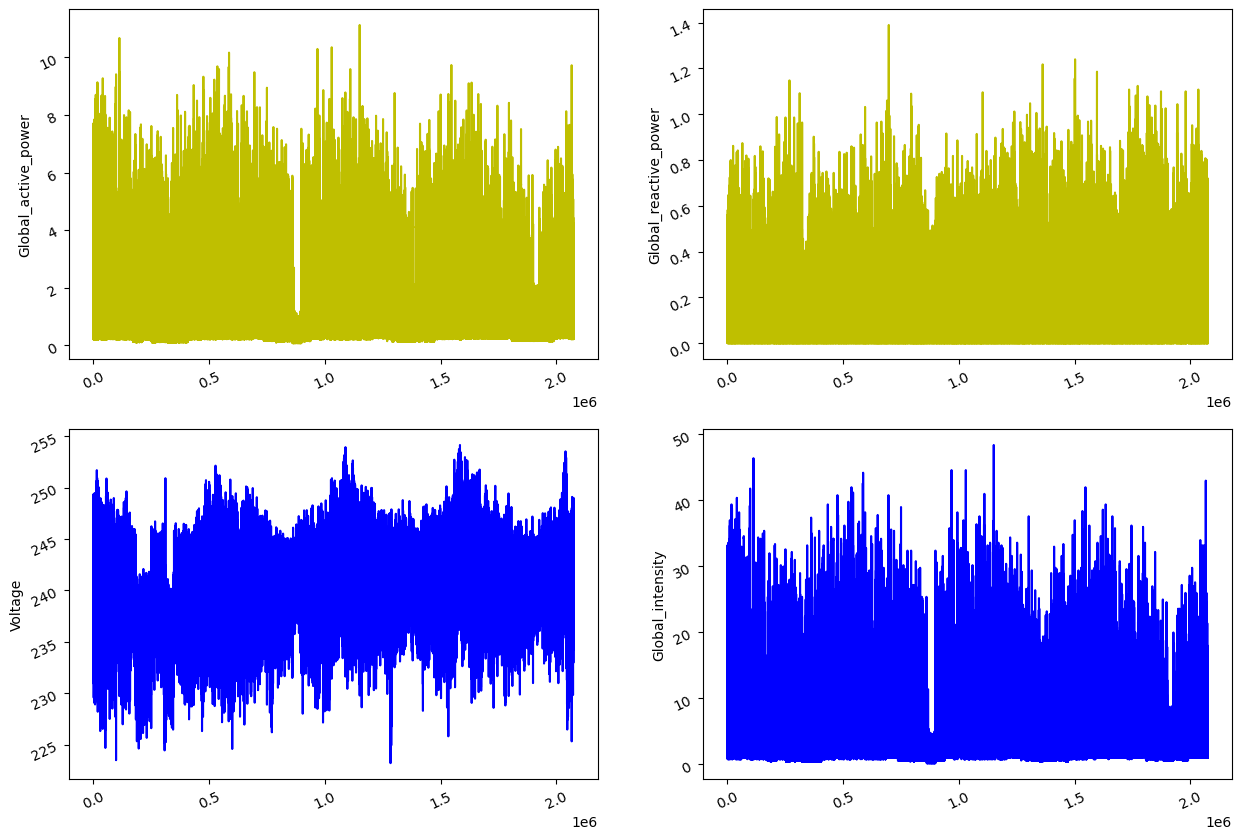

In [27]:
fig,ax =  plt.subplots( 2, 2, figsize = ( 15, 10))
sns.lineplot( x = df.index, y = "Global_active_power",color = 'y', 
             data = df, ax = ax[0][0])
ax[0][0].tick_params(labelrotation = 25)

sns.lineplot( x = df.index, y = "Global_reactive_power",color = 'y', 
             data = df,ax = ax[0][1])
ax[0][1].tick_params(labelrotation = 25)

sns.lineplot(x = df.index, y = "Voltage", 
             color = 'b', data = df,
             ax = ax[1][0])
ax[1][0].tick_params(labelrotation = 25)
  
sns.lineplot(x = df.index, y = "Global_intensity", 
             color = 'b', data = df, 
             ax = ax[1][1])
ax[1][1].tick_params(labelrotation = 25)


## The graph above  plot shows the sesonality of the data, this plot will be futher expanded on using our next plots, in order to visualize our seasonality better

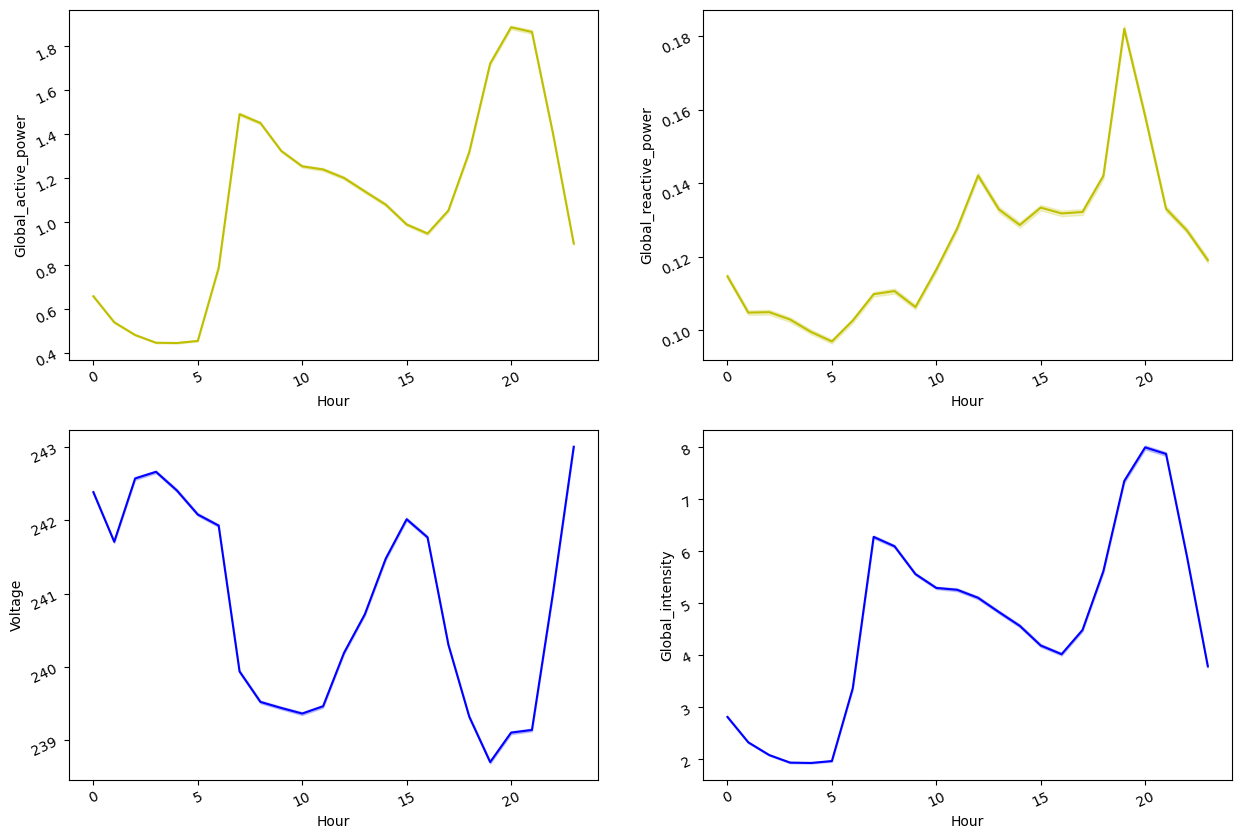

In [28]:
# Visualizations across hours 
fig,ax =  plt.subplots( 2, 2, figsize = ( 15, 10))
sns.lineplot( x = df['Hour'], y = "Global_active_power",color = 'y', 
             data = df, ax = ax[0][0])
ax[0][0].tick_params(labelrotation = 25)

sns.lineplot( x = df['Hour'], y = "Global_reactive_power",color = 'y', 
             data = df,ax = ax[0][1])
ax[0][1].tick_params(labelrotation = 25)

sns.lineplot(x = df['Hour'], y = "Voltage", 
             color = 'b', data = df,
             ax = ax[1][0])
ax[1][0].tick_params(labelrotation = 25)
  
sns.lineplot(x = df['Hour'], y = "Global_intensity", 
             color = 'b', data = df, 
             ax = ax[1][1])
ax[1][1].tick_params(labelrotation = 25)


## the garaph above   based on an hourly basis in our to visualize our seasonality,We have 2 peaks,So a major takeaway from the plots are the actual household usage (Global active Power), which has two peaks and majorly between 19:00 - 21:00 and 6:00 - 8:00 

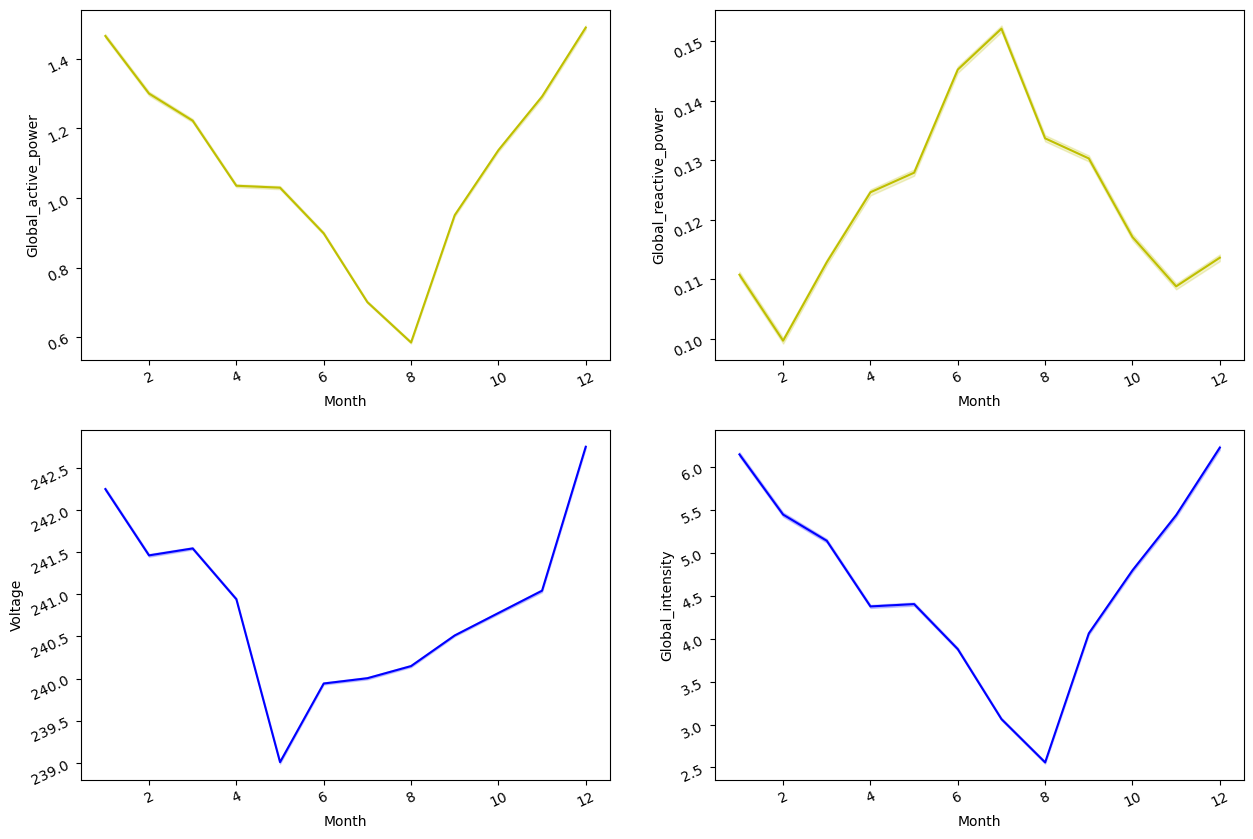

In [29]:
# Visualizations across Month 
fig,ax =  plt.subplots( 2, 2, figsize = ( 15, 10))
sns.lineplot( x = df['Month'], y = "Global_active_power",color = 'y', 
             data = df, ax = ax[0][0])
ax[0][0].tick_params(labelrotation = 25)

sns.lineplot( x = df['Month'], y = "Global_reactive_power",color = 'y', 
             data = df,ax = ax[0][1])
ax[0][1].tick_params(labelrotation = 25)

sns.lineplot(x = df['Month'], y = "Voltage", 
             color = 'b', data = df,
             ax = ax[1][0])
ax[1][0].tick_params(labelrotation = 25)
  
sns.lineplot(x = df['Month'], y = "Global_intensity", 
             color = 'b', data = df, 
             ax = ax[1][1])
ax[1][1].tick_params(labelrotation = 25)

## The plots show some imilarities when displayed across months, there is a very sharp spike downwards on all the plots, which can understood as a response to the varying changes in season, this is especially true for global active power, which drops during the summer and rises in winter season

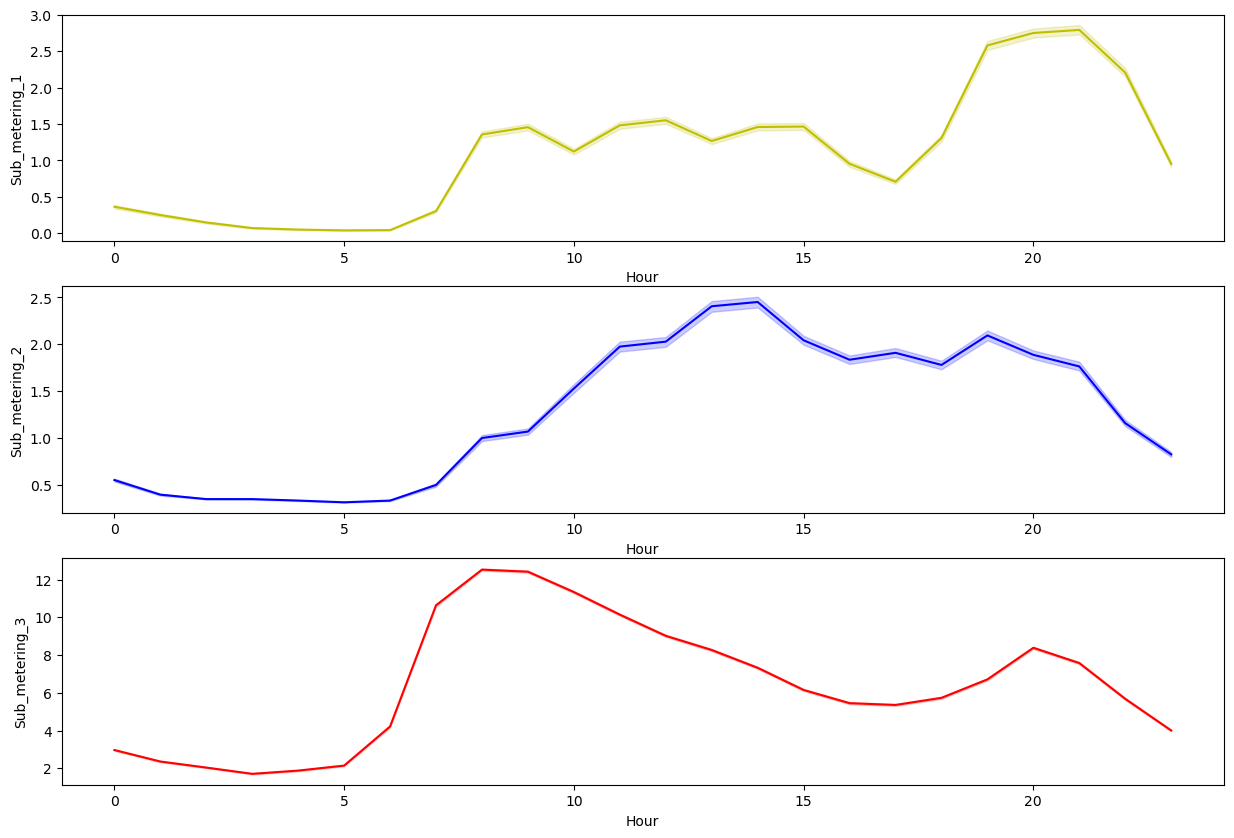

In [30]:
# Visualizations across Hour 
fig,ax =  plt.subplots( 3, 1, figsize = ( 15, 10))


sns.lineplot( x = df['Hour'], y = "Sub_metering_1",color = 'y', 
             data = df,ax = ax[0])


sns.lineplot(x = df['Hour'], y = "Sub_metering_2", 
             color = 'b', data = df,
             ax = ax[1])

  
sns.lineplot(x = df['Hour'], y = "Sub_metering_3", 
             color = 'r', data = df, 
             ax = ax[2])
plt.show()

The plot above shows the energy distribution per hour for each sub meter. A quick thing to nte is that the submeter(1) for kitchen increases from 18:00 - 21:00 before experiencing a sharp decline and increasing by 7:00. The submeter(2) for Laundry also experiences two peaks, with one in the early hours of the evening and the higher one in the latter part of the day. The last submeter(3) for Air conditiong and water heater also experiences two peaks, with the lower peak in the early evening (assumed mostly for water heater) and a higher peak from the early hours of the morning(assumed entails mostly a combination of the water heater and the Air conditioning)

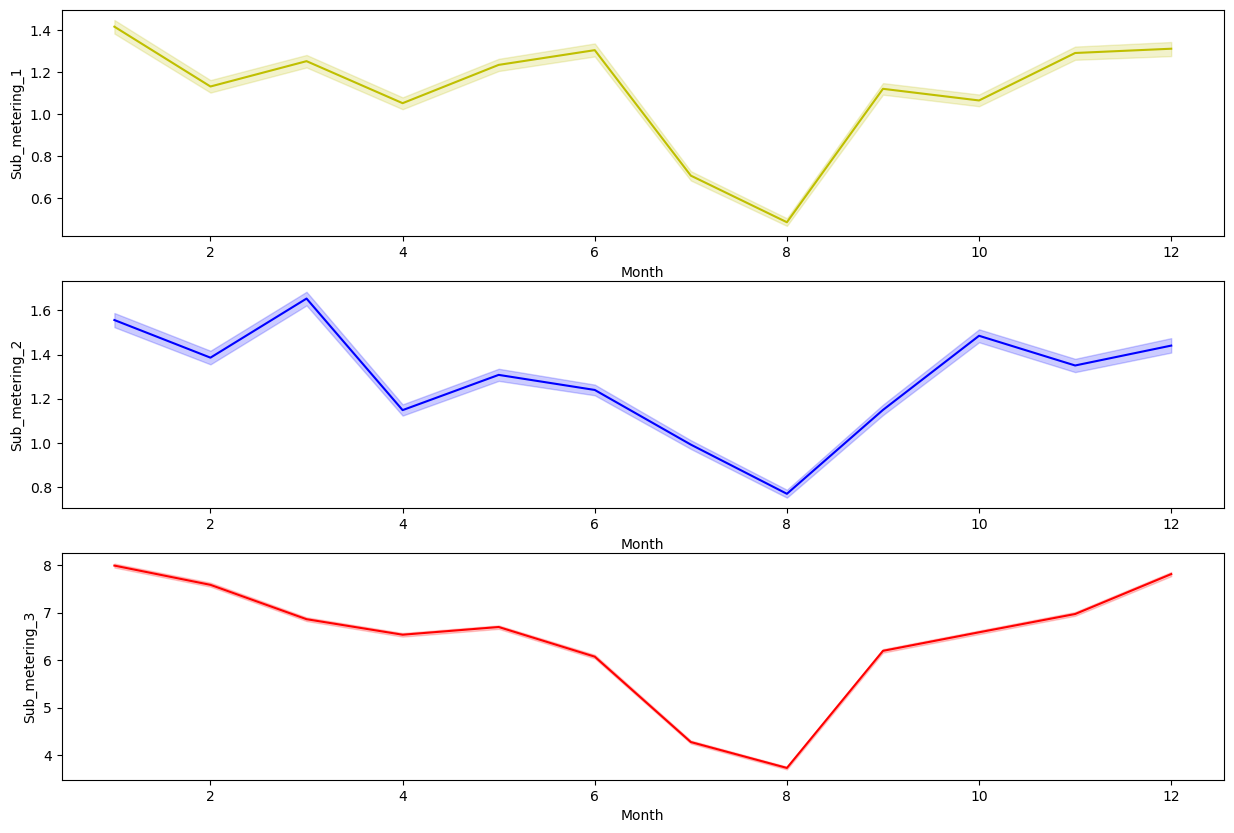

In [31]:
# Visualizations across Month
fig,ax =  plt.subplots( 3, 1, figsize = ( 15, 10))


sns.lineplot( x = df['Month'], y = "Sub_metering_1",color = 'y', 
             data = df,ax = ax[0])


sns.lineplot(x = df['Month'], y = "Sub_metering_2", 
             color = 'b', data = df,
             ax = ax[1])

  
sns.lineplot(x = df['Month'], y = "Sub_metering_3", 
             color = 'r', data = df, 
             ax = ax[2])
plt.show()

 The plots above also show a similarity as there is a spike downward during the summer and peak during the colder seasons
  a spike downward from june to August  then it upward to achieve the higer peak in winter 

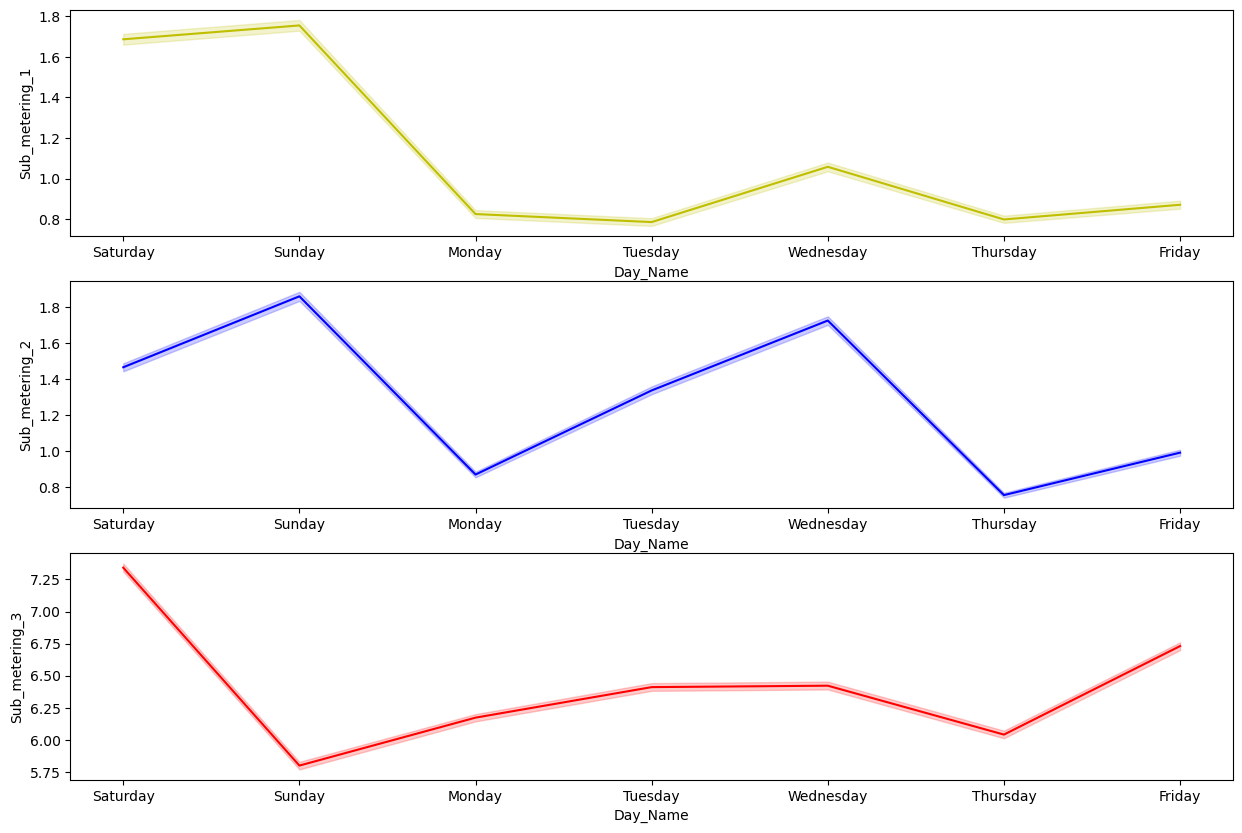

In [32]:
# Visualizations across day 
fig,ax =  plt.subplots( 3, 1, figsize = ( 15, 10))


sns.lineplot( x = df['Day_Name'], y = "Sub_metering_1",color = 'y', 
             data = df,ax = ax[0])


sns.lineplot(x = df['Day_Name'], y = "Sub_metering_2", 
             color = 'b', data = df,
             ax = ax[1])

  
sns.lineplot(x = df['Day_Name'], y = "Sub_metering_3", 
             color = 'r', data = df, 
             ax = ax[2])


plt.show()

The plots above  show a sharp pike in the middle day during a week and highest peak in the end of the week

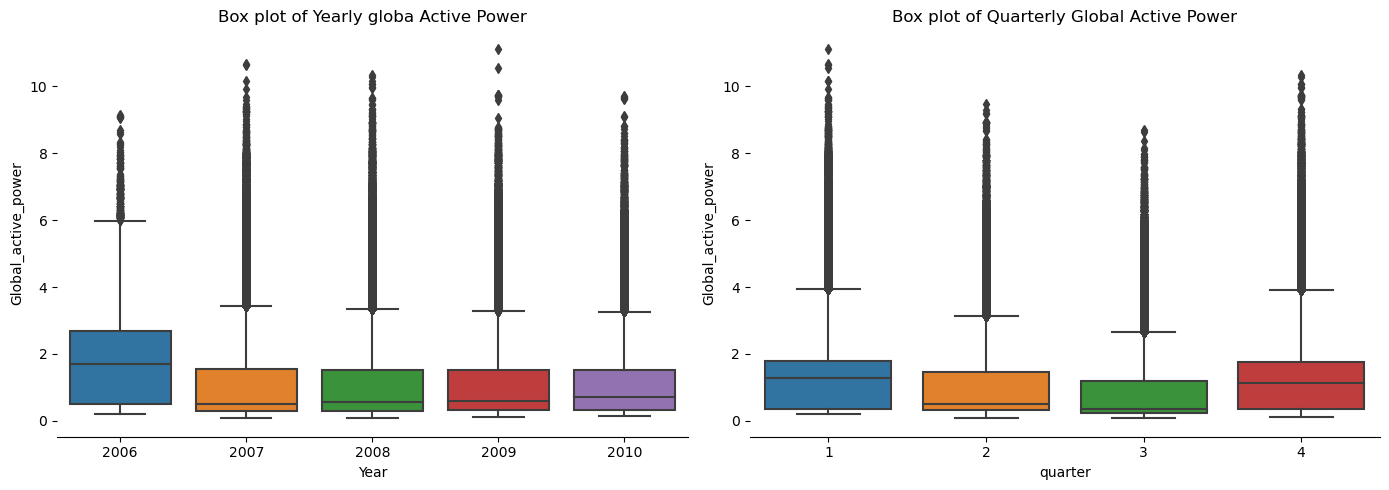

In [33]:
# Box plot of yearly vs quartly global active power
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x='Year', y='Global_active_power',data=df)
plt.xlabel('Year')
plt.title('Box plot of Yearly globa Active Power')
sns.despine(left=True)
plt.tight_layout()

plt.subplot(1,2,2)
sns.boxplot(x='quarter',y='Global_active_power',data=df)
plt.xlabel('quarter')
plt.title('Box plot of Quarterly Global Active Power')
sns.despine(left=True)
plt.tight_layout()

In [34]:
df['Sub_metering']=df['Sub_metering_1']+df['Sub_metering_2']+df['Sub_metering_3']
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date,Year,Month,Day_Name,Hour,quarter,Sub_metering
1,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,Saturday,17,4,18.0
2,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,Saturday,17,4,17.0
3,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,Saturday,17,4,19.0
4,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,Saturday,17,4,18.0
5,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,Saturday,17,4,18.0


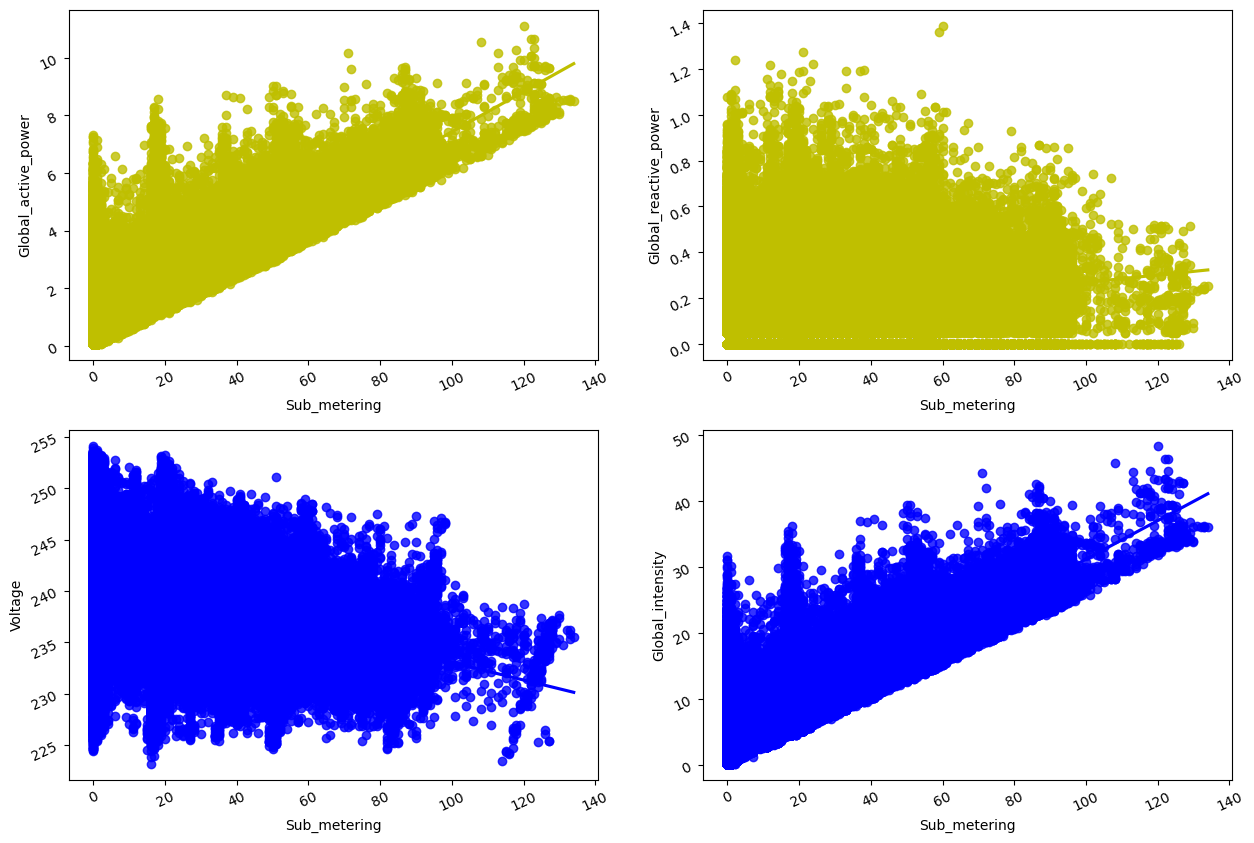

In [35]:
# Visualizations across Sub_metering 
fig,ax =  plt.subplots( 2, 2, figsize = ( 15, 10))
sns.regplot( x = df['Sub_metering'], y = "Global_active_power",color = 'y', 
             data = df, ax = ax[0][0])
ax[0][0].tick_params(labelrotation = 25)

sns.regplot( x = df['Sub_metering'], y = "Global_reactive_power",color = 'y', 
             data = df,ax = ax[0][1])
ax[0][1].tick_params(labelrotation = 25)

sns.regplot(x = df['Sub_metering'], y = "Voltage", 
             color = 'b', data = df,
             ax = ax[1][0])
ax[1][0].tick_params(labelrotation = 25)
  
sns.regplot(x = df['Sub_metering'], y = "Global_intensity", 
             color = 'b', data = df, 
             ax = ax[1][1])
ax[1][1].tick_params(labelrotation = 25)

The plot above shows the correlation of some festuresets in relation to the  sub _meter readings, the Global active power and the Global intensity share a similar relationship with the total sub metering showing a positive correlation. The other plots show correlations but not as high as the previously mentioned features, but can be seen visually on their individual plot

## engineering feature

globalactivepower*1000/60 - submetering1 - submetering2 - submetering3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

In [36]:
eq1=df['Global_active_power']*1000/60
eq2=df['Sub_metering_1']+df['Sub_metering_2']+df['Sub_metering_3']
df['active energy consumed']=eq1-eq2
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date,Year,Month,Day_Name,Hour,quarter,Sub_metering,active energy consumed
1,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,Saturday,17,4,18.0,52.266667
2,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,Saturday,17,4,17.0,72.333333
3,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,Saturday,17,4,19.0,70.566667
4,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,Saturday,17,4,18.0,71.800000
5,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,Saturday,17,4,18.0,43.100000


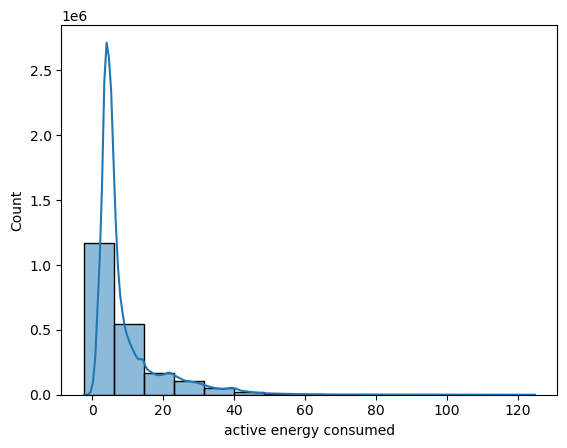

In [37]:
# Distribution of the target variables
sns.histplot(data=df, x='active energy consumed', bins=15, kde=True)
plt.show()

<AxesSubplot:xlabel='Day_Name', ylabel='Global_active_power'>

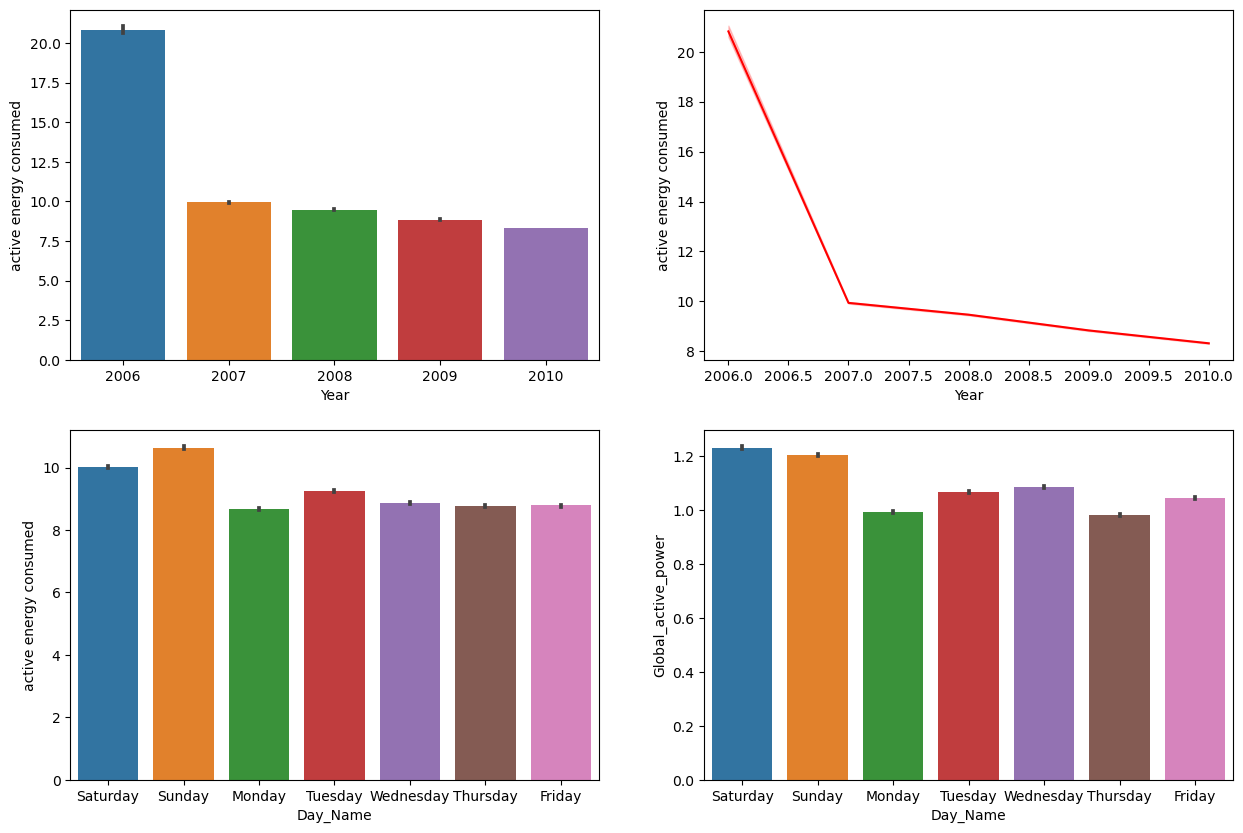

In [38]:
fig,ax =  plt.subplots(2, 2, figsize = ( 15, 10))
sns.barplot(x= df['Year'], y="active energy consumed", data=df,ax=ax[0][0])
sns.lineplot(x = df['Year'], y = "active energy consumed",color = 'r', data = df,ax=ax[0][1])
sns.barplot(x= df['Day_Name'], y="active energy consumed", data=df, ax = ax[1][0])
sns.barplot(x= df['Day_Name'], y="Global_active_power", data=df, ax = ax[1][1])

<AxesSubplot:xlabel='Year', ylabel='active energy consumed'>

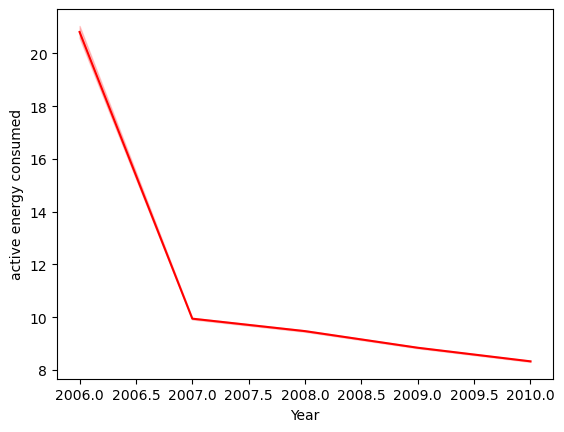

In [39]:
sns.lineplot(x = df['Year'], y = "active energy consumed",color = 'r', data = df, )

we find the power consumed in2006 is the bigest than other years,whish is  semi saturated

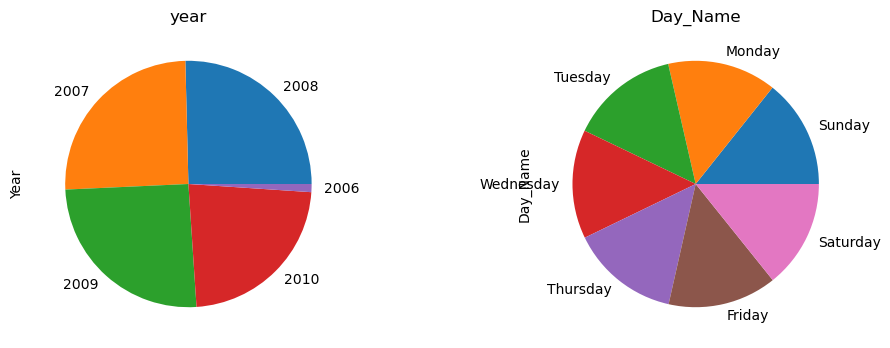

In [40]:
plt.subplot(121)
df['Year'].value_counts(normalize=True).plot.pie(figsize=(12,4), title= 'year')

plt.subplot(122)
df['Day_Name'].value_counts(normalize=True).plot.pie(title= 'Day_Name')

plt.show()

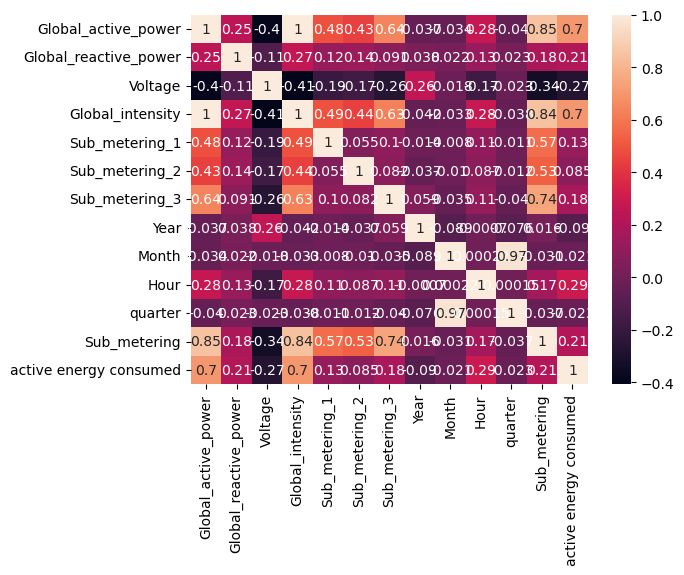

In [41]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [42]:
train = df.drop([ 'Hour', 'Month','Year','Day_Name','active energy consumed','date','quarter','Sub_metering'], axis=1)
train.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2,5.360,0.436,233.63,23.0,0.0,1.0,16.0


array([[<AxesSubplot:title={'center':'Global_active_power'}>,
        <AxesSubplot:title={'center':'Global_reactive_power'}>,
        <AxesSubplot:title={'center':'Voltage'}>],
       [<AxesSubplot:title={'center':'Global_intensity'}>,
        <AxesSubplot:title={'center':'Sub_metering_1'}>,
        <AxesSubplot:title={'center':'Sub_metering_2'}>],
       [<AxesSubplot:title={'center':'Sub_metering_3'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

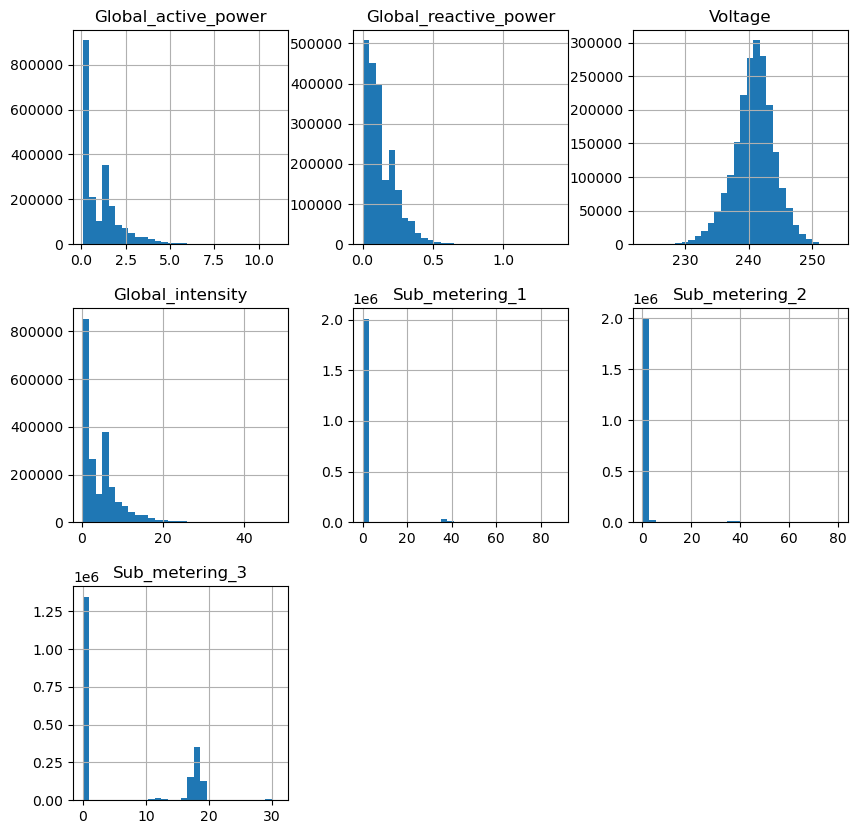

In [43]:
train.hist(figsize = (10, 10), bins=30)

In [44]:
train.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [263]:
scaler = preprocessing.StandardScaler()
data_scaled = scaler.fit_transform(train)

pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,-2.482644e-16,-8.074335e-14,3.485827e-14,5.518534e-13,3.229613e-13,1.607804e-13,-5.901543e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.591676e-01,-1.096109e+00,-5.452390e+00,-9.949065e-01,-1.816566e-01,-2.225658e-01,-7.621079e-01
25%,-7.388807e-01,-6.694967e-01,-5.691751e-01,-7.238288e-01,-1.816566e-01,-2.225658e-01,-7.621079e-01
50%,-4.635220e-01,-2.073334e-01,5.513458e-02,-4.527510e-01,-1.816566e-01,-2.225658e-01,-6.433361e-01
75%,4.157267e-01,6.281156e-01,6.269034e-01,4.056619e-01,-1.816566e-01,-4.976068e-02,1.257014e+00
max,9.529149e+00,1.125787e+01,4.113148e+00,9.893384e+00,1.420705e+01,1.360185e+01,2.919819e+00


In [264]:
X = train.drop(['Global_active_power'], axis=1)
y = train['Global_active_power']

In [265]:
X

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,0.418,234.84,18.4,0.0,1.0,17.0
2,0.436,233.63,23.0,0.0,1.0,16.0
3,0.498,233.29,23.0,0.0,2.0,17.0
4,0.502,233.74,23.0,0.0,1.0,17.0
5,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...
2075255,0.000,240.43,4.0,0.0,0.0,0.0
2075256,0.000,240.00,4.0,0.0,0.0,0.0
2075257,0.000,239.82,3.8,0.0,0.0,0.0
2075258,0.000,239.70,3.8,0.0,0.0,0.0


In [266]:
y

1          4.216
2          5.360
3          5.374
4          5.388
5          3.666
           ...  
2075255    0.946
2075256    0.944
2075257    0.938
2075258    0.934
2075259    0.932
Name: Global_active_power, Length: 2075259, dtype: float64

#using minmax scaler to scale all the datas

from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()
scaled_x=mc.fit_transform(train)

In [267]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import preprocessing
import plotly.express as px
from sklearn.datasets import make_blobs

In [268]:
kmeans = cluster.KMeans(n_clusters=2, init='k-means++') # ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [269]:
kmeans.inertia_

10006876.857783867

In [270]:
SSE = []
for i in range(1,20):
    kmeans = cluster.KMeans(n_clusters = i, init='k-means++') # iterate from range (1, 20)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker="*")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

KeyboardInterrupt: 

In [ ]:
kmeans = cluster.KMeans(n_clusters=5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
pred

In [ ]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

In [ ]:
X.columns

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [57]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1452681, 6), (622578, 6), (1452681,), (622578,))

In [58]:
# check missing values in X_train

X_train.isnull().sum(),X_test.isnull().sum(),y_train.isnull().sum(),y_test.isnull().sum()

(Global_reactive_power    0
 Voltage                  0
 Global_intensity         0
 Sub_metering_1           0
 Sub_metering_2           0
 Sub_metering_3           0
 dtype: int64,
 Global_reactive_power    0
 Voltage                  0
 Global_intensity         0
 Sub_metering_1           0
 Sub_metering_2           0
 Sub_metering_3           0
 dtype: int64,
 0,
 0)

In [59]:
y_train

529399     2.098
1115552    2.284
1934311    0.906
877715     0.082
1810004    0.400
           ...  
963396     2.950
117953     0.472
1484406    0.218
305712     0.302
2034349    0.410
Name: Global_active_power, Length: 1452681, dtype: float64

In [60]:
X_train.Voltage.max(), X_test.Voltage.max(),X_train.Voltage.min(), X_test.Voltage.min()

(254.15, 253.94, 223.49, 223.2)

In [61]:
X_train.describe()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1.452681e+06,1.452681e+06,1.452681e+06,1.452681e+06,1.452681e+06,1.452681e+06
mean,1.233105e-01,2.408405e+02,4.606393e+00,1.105992e+00,1.291971e+00,6.418542e+00
std,1.125589e-01,3.237798e+00,4.425337e+00,6.100962e+00,5.804353e+00,8.419015e+00
min,0.000000e+00,2.234900e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.800000e-02,2.390000e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [62]:
y_train.describe()

count    1.452681e+06
mean     1.086717e+00
std      1.052860e+00
min      7.600000e-02
25%      3.080000e-01
50%      6.000000e-01
75%      1.524000e+00
max      1.112200e+01
Name: Global_active_power, dtype: float64

In [63]:
## importing the library

from sklearn.linear_model import LinearRegression

In [64]:
LR=LinearRegression()
LR.fit(X_train,y_train)  ## fitting the training data

X_test_pred_LR=LR.predict(X_test)  ## predicted x test

In [65]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1452681, 6), (622578, 6), (1452681,), (622578,))

In [138]:
X_test_pred_LR[10]

1.9452495422522427

In [139]:
y_test.iloc[10]

1.94

In [68]:
X_train_pred_LR=LR.predict(X_train) ##predicted x train

X_train_pred_LR

array([2.0825057 , 2.39795553, 0.89839786, ..., 0.19401953, 0.31591901,
       0.43168689])

In [69]:
y_train

529399     2.098
1115552    2.284
1934311    0.906
877715     0.082
1810004    0.400
           ...  
963396     2.950
117953     0.472
1484406    0.218
305712     0.302
2034349    0.410
Name: Global_active_power, Length: 1452681, dtype: float64

In [70]:
from sklearn.metrics import r2_score
train_score=r2_score(y_train,X_train_pred_LR)
print('Linear Regression r2_score for training is',train_score)

Linear Regression r2_score for training is 0.9985234383244325


In [71]:
test_score=r2_score(y_test,X_test_pred_LR)
print('Linear Regression r2_score for testing is',test_score)

Linear Regression r2_score for testing is 0.9985285420186771


In [72]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,X_test_pred_LR)

0.04601624726895689

In [73]:
from math import sqrt
from sklearn.metrics import mean_squared_error

print(f"Root mean squared error of data is {sqrt(mean_squared_error(y_test,X_test_pred_LR))}")

Root mean squared error of data is 0.040427087558243736


In [74]:
from sklearn.metrics import r2_score

print(f"R-squared of data is {r2_score(y_test,X_test_pred_LR)}")

R-squared of data is 0.9985285420186771


In [75]:
X_test_pred_LR,X_test_pred_LR.shape

(array([3.15879328, 2.1785955 , 0.65804242, ..., 2.27320012, 1.45685284,
        1.39603699]),
 (622578,))

In [76]:
y_test

677029     3.112
1770726    2.210
1378482    0.666
1819665    1.292
57830      1.964
           ...  
776208     1.272
1895340    1.086
121708     2.330
1219434    1.448
1056621    1.412
Name: Global_active_power, Length: 622578, dtype: float64

## RandomForestRegressor

In [77]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(X_train,y_train) ## fitting the data

x_test_pred_RF=RF.predict(X_test)  ## predicted x test

In [136]:
x_test_pred_RF[10]

1.9360599999999997

In [137]:
y_test.iloc[10]

1.94

In [80]:
x_train_pred_RF=LR.predict(X_train)  ## predicted x train
x_train_pred_RF

array([2.0825057 , 2.39795553, 0.89839786, ..., 0.19401953, 0.31591901,
       0.43168689])

In [81]:
x_test_pred_RF=RF.predict(X_test)  ## predicted x train
x_test_pred_RF

array([3.13904, 2.18412, 0.66352, ..., 2.3048 , 1.46918, 1.38531])

In [82]:
y_train

529399     2.098
1115552    2.284
1934311    0.906
877715     0.082
1810004    0.400
           ...  
963396     2.950
117953     0.472
1484406    0.218
305712     0.302
2034349    0.410
Name: Global_active_power, Length: 1452681, dtype: float64

In [83]:
from math import sqrt
from sklearn.metrics import mean_squared_error

print(f"Root mean squared error of data is {sqrt(mean_squared_error(y_test,x_test_pred_RF))}")

Root mean squared error of data is 0.032481195623078586


In [84]:
from sklearn.metrics import r2_score

print(f"R-squared of data is {r2_score(y_test,x_test_pred_RF)}")

R-squared of data is 0.9990501238812307


Random Forest Regressor Score

In [85]:
print('Training score for Random Forest Regressor is',RF.score(X_train,y_train))

Training score for Random Forest Regressor is 0.9998128874213775


In [86]:
print('Testing score for Random Forest Regressor is',RF.score(X_test,y_test))

Testing score for Random Forest Regressor is 0.9990501238812307


In [87]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_train,x_train_pred_RF)


0.04592171764147495

In [88]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,x_test_pred_RF)

0.031789691700317126

# DecisionTreeRegressor

In [89]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [90]:
X_test_pred_DT=DT.predict(X_test) ## predicted x test

X_test_pred_DT  ## predicted x test

array([3.148, 2.114, 0.606, ..., 2.304, 1.476, 1.388])

In [339]:
pd.DataFrame(X_test_pred_DT)

,0
0,3.1480
1,2.1140
2,0.6060
3,1.3180
4,1.9740
...,...
622573,1.3024
622574,1.1180
622575,2.3040
622576,1.4760


In [337]:
y_test ## y test

677029     3.112
1770726    2.210
1378482    0.666
1819665    1.292
57830      1.964
           ...  
776208     1.272
1895340    1.086
121708     2.330
1219434    1.448
1056621    1.412
Name: Global_active_power, Length: 622578, dtype: float64

In [92]:
X_train_pred_DT=DT.predict(X_train)  ## predicted x train

X_train_pred_DT

array([2.098     , 2.284     , 0.90600352, ..., 0.188     , 0.302     ,
       0.41      ])

In [93]:
y_train ## y train

529399     2.098
1115552    2.284
1934311    0.906
877715     0.082
1810004    0.400
           ...  
963396     2.950
117953     0.472
1484406    0.218
305712     0.302
2034349    0.410
Name: Global_active_power, Length: 1452681, dtype: float64

In [94]:
print('Testing score for Decision Tree Regressor is',DT.score(X_test,y_test))

Testing score for Decision Tree Regressor is 0.9984054221752421


In [95]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,X_test_pred_DT)

0.03672730170441221

In [96]:
from math import sqrt
from sklearn.metrics import mean_squared_error

print(f"Root mean squared error of data is {sqrt(mean_squared_error(y_test,X_test_pred_DT))}")

Root mean squared error of data is 0.042084423538990265


In [97]:
from sklearn.metrics import r2_score

print(f"R-squared of data is {r2_score(y_test,X_test_pred_DT)}")

R-squared of data is 0.9984054221752421


# Xtreme Gradient Boosting

In [98]:
import xgboost as xgb
from xgboost import XGBRegressor
XGB=XGBRegressor()
XGB = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, n_estimators = 10)
XGB.fit(X_train,y_train) 

xtest_XGB_pred=XGB.predict(X_test) ## predicted x test

In [207]:
xtest_XGB_pred[1000]

1.1915097

In [209]:
y_test.iloc[1000]

2.314

In [210]:
xtrain_XGB_pred=XGB.predict(X_train)

In [211]:
xtrain_XGB_pred[10000]

0.61664504

In [212]:
y_train.iloc[10000]

0.318

In [102]:
print('Training score for XGB is',XGB.score(X_train,y_train))

Training score for XGB is 0.47673005488796083


In [103]:
print('Testing score for XGB is',XGB.score(X_test,y_test))

Testing score for XGB is 0.47789620472104855


In [104]:
x_XGB_pred=XGB.predict(X_train)

In [105]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,xtest_XGB_pred)

0.8451456122010025

In [106]:
rmse = np.sqrt(mean_squared_error(y_train,xtrain_XGB_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.761612


In [344]:
print('Xtreme Gradient Boosting Training Accuracy: ', round(XGB.score(X_train, y_train), 2))

print('Xtreme Gradient Boosting Testing Accuracy: ', round(XGB.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.48
LogisticRegression Testing Accuracy:  0.48


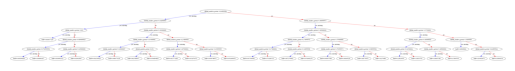

In [107]:
import matplotlib.pyplot as plt

xgb.plot_tree(XGB, num_trees=4) # change num_trees to plot the specific tree you want to visualize
plt.rcParams['figure.figsize'] = [200, 200]
plt.show()

# plot importances
xgb.plot_importance(XGB)
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [108]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [109]:
#checking the model performance
from sklearn.metrics import mean_squared_error as mse ,mean_absolute_error
y_pred = xgb.predict(X_test)

n = mse(y_test , y_pred)**0.5
print("rmse = ", n)

rmse =  0.030624641354954674


# Model Saving

In [348]:
import pickle 

pickle.dump(DT, open("log_reg.pkl", 'wb'))

# model loading

In [349]:
loaded_model= pickle.load(open("log_reg.pkl",'rb'))

In [350]:
pickle.dump(DT, open('model.pkl', 'wb'))
pickled_model = pickle.load(open('model.pkl', 'rb'))

## Model Usage

In [351]:
X_test.iloc[10]

Global_reactive_power      0.074
Voltage                  239.000
Global_intensity           8.000
Sub_metering_1             0.000
Sub_metering_2             0.000
Sub_metering_3            29.000
Name: 1255198, dtype: float64

In [352]:
def preprocess_fit(X):
    # Define transformers
    
    transformer =pd.DataFrame(X, index=[0])
    
    
   
    return transformer

In [353]:
transformer = preprocess_fit(X)

In [354]:
X_test.iloc[10]

Global_reactive_power      0.074
Voltage                  239.000
Global_intensity           8.000
Sub_metering_1             0.000
Sub_metering_2             0.000
Sub_metering_3            29.000
Name: 1255198, dtype: float64

In [355]:
pd.DataFrame(X_test.iloc[10]).T

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1255198,0.074,239.0,8.0,0.0,0.0,29.0


In [356]:
pickle.dump(transformer, open("transformer.pkl", 'wb'))

In [357]:
trans = pickle.load(open('transformer.pkl', 'rb'))
model = pickle.load(open("log_reg.pkl",'rb'))

In [358]:
loaded_model.predict(x)

array([1.932])

In [359]:
y_test.iloc[10]

1.94

In [360]:
x = X_test.iloc[10].to_dict()

In [361]:
x

{'Global_reactive_power': 0.074,
 'Voltage': 239.0,
 'Global_intensity': 8.0,
 'Sub_metering_1': 0.0,
 'Sub_metering_2': 0.0,
 'Sub_metering_3': 29.0}

In [362]:
x = pd.DataFrame(x, index=[0])
x

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.074,239.0,8.0,0.0,0.0,29.0


In [363]:
trans = pickle.load(open('transformer.pkl', 'rb'))
model = pickle.load(open("log_reg.pkl",'rb'))

In [364]:
cust ={'Global_reactive_power': 0.074,
 'Voltage': 239,
 'Global_intensity': 8,
 'Sub_metering_1': 0,
 'Sub_metering_2': 0,
 'Sub_metering_3': 17 }

In [365]:
x =preprocess_fit(cust)
x

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.074,239,8,0,0,17


In [366]:
model.predict(x)

array([1.932])

In [367]:
y_test.iloc[10]

1.94